In [1]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Define the function to compute MAE
def compute_mae(image1, image2):
    return np.abs(image1 - image2).mean()

# Paths to the folders
gt_folder = "/home/PET-CT/splited_data_15k/train/B"
condition_folder = "/home/PET-CT/splited_data_15k/train/A"
# pre_folder = "results/108_CT2PET_UncerBBDM3c/LBBDM-f4/sample_to_eval/200"

dataset_name = 'UncerBBDM_1Unet_confloss_15k_training_samples_top_model'

pre_folder = "/home/PET-CT/thaind/BBDM_folk/results/" + dataset_name + "/LBBDM-f4/sample_to_eval/200"

mae_scores = []
high_mae, high_mae_gts, high_mae_pds, high_mae_conditions = [], [], [], []

# Iterate through the files in the ground truth folder
for filename in os.listdir(gt_folder):
    # Make sure the file is a numpy array
    if filename.endswith(".npy"):
        # Construct the paths for the corresponding ground truth and predicted files
        try:
            gt_path = os.path.join(gt_folder, filename)
            pre_path = os.path.join(pre_folder, filename)
        
            # Load the images as numpy arrays
            gt_img = np.load(gt_path, allow_pickle=True)
            pre_img = np.load(pre_path, allow_pickle=True)
        except:
            continue   
        # Preprocess the predicted image
        pre_img1 = pre_img.mean(axis=-1) / 32767.0
        
        # Normalize the ground truth image
        gt_img1 = gt_img / 32767.0

        mae = compute_mae(pre_img1, gt_img1)
        mae_scores.append(mae * 32767)

        if mae * 32767 > 1000  : 
            high_mae_gts.append(gt_img) 
            high_mae_pds.append(pre_img)
            high_mae_conditions.append(np.load(os.path.join(condition_folder, filename), allow_pickle=True))
            high_mae.append(mae * 32767)

# Calculate the mean scores over all pairs
# mean_ssim = np.mean(ssim_scores)
# mean_psnr = np.mean(psnr_scores)
mean_mae = np.mean(mae_scores)

# Print the mean metrics
# print("Mean SSIM: {}".format(mean_ssim))
# print("Mean PSNR: {}".format(mean_psnr))
print("Mean MAE: {}".format(mean_mae))

Mean MAE: 295.19282183243786


In [4]:
import os
def create_fol(dir_path): 
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [5]:
import shutil 
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Define the function to compute MAE
def compute_mae(image1, image2):
    return np.abs(image1 - image2).mean()

# Paths to the folders
gt_folder = "/home/PET-CT/splited_data_15k/train/B"
condition_folder = "/home/PET-CT/splited_data_15k/train/A"
# pre_folder = "results/108_CT2PET_UncerBBDM3c/LBBDM-f4/sample_to_eval/200"

dataset_name = 'UncerBBDM_1Unet_confloss_15k_training_samples_top_model'

pre_folder = "/home/PET-CT/thaind/BBDM_folk/results/" + dataset_name + "/LBBDM-f4/sample_to_eval/200"

mae_scores = []
high_mae, high_mae_gts, high_mae_pds, high_mae_conditions = [], [], [], []


bad_folder = './baddataset/test'
create_fol(bad_folder + '/A') 
create_fol(bad_folder + '/B')


# Iterate through the files in the ground truth folder
for filename in os.listdir(gt_folder):
    # Make sure the file is a numpy array
    if filename.endswith(".npy"):
        # Construct the paths for the corresponding ground truth and predicted files
        try:
            gt_path = os.path.join(gt_folder, filename)
            pre_path = os.path.join(pre_folder, filename)
        
            # Load the images as numpy arrays
            gt_img = np.load(gt_path, allow_pickle=True)
            pre_img = np.load(pre_path, allow_pickle=True)
        except:
            continue   
        # Preprocess the predicted image
        pre_img1 = pre_img.mean(axis=-1) / 32767.0
        
        # Normalize the ground truth image
        gt_img1 = gt_img / 32767.0

        mae = compute_mae(pre_img1, gt_img1)
        mae_scores.append(mae * 32767)

        if mae * 32767 > 1000  : 
            shutil.copy(os.path.join(gt_folder, filename), os.path.join(bad_folder + '/B', filename) )
            shutil.copy(os.path.join(condition_folder, filename), os.path.join(bad_folder + '/A', filename) )
            
            # high_mae_gts.append(gt_img) 
            # high_mae_pds.append(pre_img)

            # high_mae_conditions.append(np.load(os.path.join(condition_folder, filename), allow_pickle=True))
            # high_mae.append(mae * 32767)

# Calculate the mean scores over all pairs
# mean_ssim = np.mean(ssim_scores)
# mean_psnr = np.mean(psnr_scores)
mean_mae = np.mean(mae_scores)

# Print the mean metrics
# print("Mean SSIM: {}".format(mean_ssim))
# print("Mean PSNR: {}".format(mean_psnr))
print("Mean MAE: {}".format(mean_mae))

Mean MAE: 295.19282183243786


In [8]:
create_fol('./baddataset/train/A')
create_fol('./baddataset/train/B')
create_fol('./baddataset/val/A')
create_fol('./baddataset/val/B')

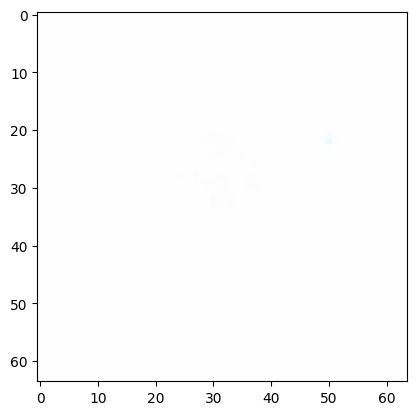

In [4]:
import matplotlib.pyplot as plt
import numpy as np
conf_path  = '/home/PET-CT/thaind/BBDM_folk/results/1130_UncerBBDM_1Unet_confloss_15k_alpha_2/LBBDM-f4/sample_to_eval/confidence/13507.npy'
np_conf = np.load(conf_path, allow_pickle=True)

plt.imshow(np_conf)


In [5]:
np_conf

array([[[0.9999944 , 0.9999443 , 0.9998375 ],
        [0.9999988 , 0.9999969 , 0.99999845],
        [0.99999857, 0.99999785, 0.99999917],
        ...,
        [0.99999905, 0.9999956 , 0.99999917],
        [0.9999994 , 0.9999933 , 0.99999905],
        [0.99986136, 0.9999856 , 0.999938  ]],

       [[0.99999857, 0.9999629 , 0.9999976 ],
        [0.9999995 , 0.99999845, 1.        ],
        [0.99999905, 0.99999905, 1.        ],
        ...,
        [0.99999964, 0.99999833, 1.        ],
        [0.9999999 , 0.9999982 , 1.        ],
        [0.9999845 , 0.9999975 , 0.9999994 ]],

       [[0.99999845, 0.9999721 , 0.99999774],
        [0.99999905, 0.9999987 , 1.        ],
        [0.99999726, 0.99999845, 1.        ],
        ...,
        [0.9999987 , 0.999997  , 1.        ],
        [0.99999976, 0.9999956 , 1.        ],
        [0.99997985, 0.99999464, 0.9999993 ]],

       ...,

       [[0.9999993 , 0.9999794 , 0.99999833],
        [0.99999905, 0.99999833, 1.        ],
        [0.9999951 , 0

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class FocalLoss(nn.Module):
    def __init__(self, gamma=0, alpha=None, size_average=True):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if isinstance(alpha,(float,int,long)): self.alpha = torch.Tensor([alpha,1-alpha])
        if isinstance(alpha,list): self.alpha = torch.Tensor(alpha)
        self.size_average = size_average

    def forward(self, input, target):
        if input.dim()>2:
            input = input.view(input.size(0),input.size(1),-1)  # N,C,H,W => N,C,H*W
            input = input.transpose(1,2)    # N,C,H*W => N,H*W,C
            input = input.contiguous().view(-1,input.size(2))   # N,H*W,C => N*H*W,C
        target = target.view(-1,1)

        logpt = F.log_softmax(input)
        logpt = logpt.gather(1,target)
        logpt = logpt.view(-1)
        pt = Variable(logpt.data.exp())

        if self.alpha is not None:
            if self.alpha.type()!=input.data.type():
                self.alpha = self.alpha.type_as(input.data)
            at = self.alpha.gather(0,target.data.view(-1))
            logpt = logpt * Variable(at)

        loss = -1 * (1-pt)**self.gamma * logpt
        if self.size_average: return loss.mean()
        else: return loss.sum()